In [63]:
import pandas as pd
import random
import faker
import seaborn as sns
import matplotlib.pyplot as  plt

# Initialize Faker to generate random names
fake = faker.Faker()

# Define number of records
num_records = 1000

# Generate data
customer_data = {
    "CustomerID": [f"CUST{str(i).zfill(4)}" if random.random() > 0.05 else None for i in range(1, num_records + 1)],
    "Name": [fake.name() if random.random() > 0.05 else None for _ in range(num_records)],
    "Age": [random.randint(18, 80) if random.random() > 0.05 else None for _ in range(num_records)],
    "Gmail": [fake.email() for _ in range(num_records)],
    "Subscription": [random.choice(["Basic", "Standard", "Premium"]) if random.random() > 0.05 else None for _ in range(num_records)],
    "Churn": [random.choice(["Yes", "No"]) for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(customer_data)

# Save to CSV
df.to_csv("customer_churn.csv", index=False)

print("CSV file 'customer_churn.csv' has been created successfully.")


CSV file 'customer_churn.csv' has been created successfully.


In [64]:
df = pd.read_csv('customer_churn.csv')
df.head()

,CustomerID,Name,Age,Gmail,Subscription,Churn
0,NaN,Anthony Ibarra,34.0,hramirez@example.net,Standard,Yes
1,CUST0002,Monica Mora,46.0,lknight@example.com,Basic,No
2,CUST0003,Rachel Ellis,47.0,watkinstiffany@example.com,Basic,Yes
3,CUST0004,Edward Jefferson,65.0,crystal95@example.org,Basic,No
4,CUST0005,Robert Brewer,50.0,williamsonanthony@example.net,Standard,Yes


In [65]:
df.shape

(1000, 6)

In [66]:
df.size

6000

In [67]:
df.isna().sum()

CustomerID      57
Name            41
Age             57
Gmail            0
Subscription    60
Churn            0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    943 non-null    object 
 1   Name          959 non-null    object 
 2   Age           943 non-null    float64
 3   Gmail         1000 non-null   object 
 4   Subscription  940 non-null    object 
 5   Churn         1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


EDA

univariate analysis

C:\Users\sangam007\AppData\Local\Temp\ipykernel_16484\541386481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], palette='coolwarm')


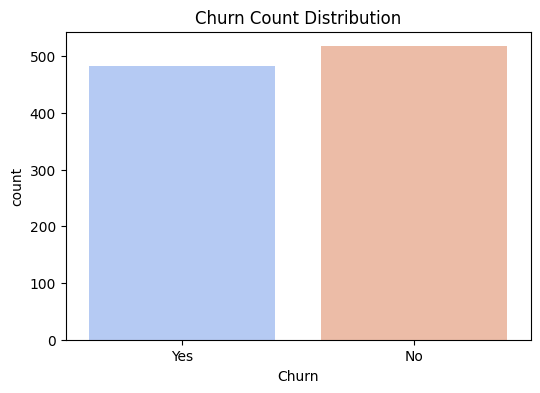

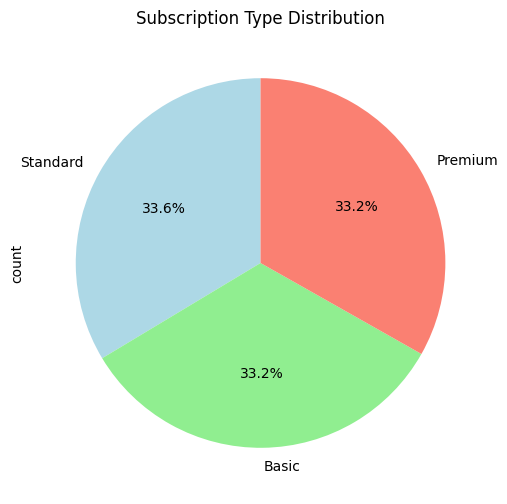

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot for Churn
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn'], palette='coolwarm')
plt.title('Churn Count Distribution')
plt.show()

# Pie Chart for Subscription Types
plt.figure(figsize=(6, 6))
df['Subscription'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Subscription Type Distribution')
plt.show()


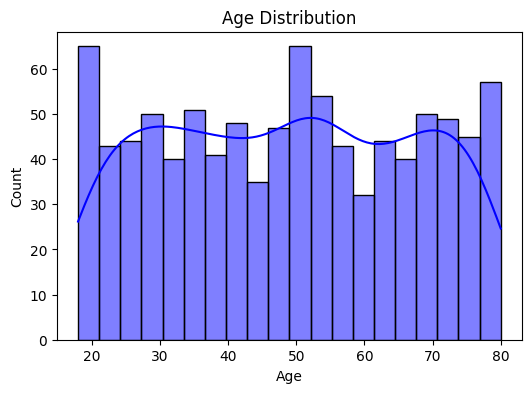

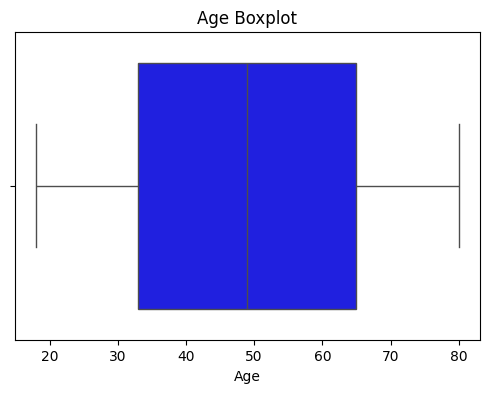

In [71]:
# Histogram for Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

# Box Plot for Age (to check outliers)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'], color='blue')
plt.title('Age Boxplot')
plt.show()


Bivariate Analysis

Age vs Churn

C:\Users\sangam007\AppData\Local\Temp\ipykernel_16484\4242576441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df['Age'], palette='coolwarm')


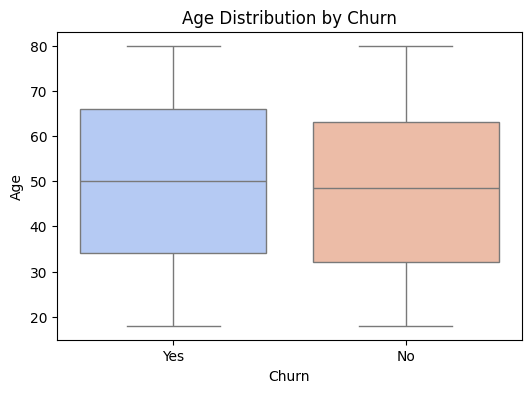

In [72]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Churn'], y=df['Age'], palette='coolwarm')
plt.title('Age Distribution by Churn')
plt.show()


Subscription vs Churn

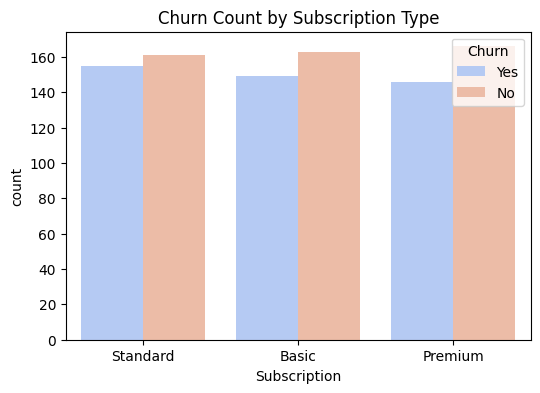

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Subscription'], hue=df['Churn'], palette='coolwarm')
plt.title('Churn Count by Subscription Type')
plt.show()


preprocessing

In [74]:
#filling the missing values

# Fill missing CustomerID with a unique identifier
df['CustomerID'] = df['CustomerID'].fillna(method='ffill')

# Fill missing Name with "Unknown"
df['Name'] = df['Name'].fillna("Unknown")

# Fill missing Age with the median value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Subscription with the most frequent value (mode)
df['Subscription'] = df['Subscription'].fillna(df['Subscription'].mode()[0])

# Fill missing Gmail with a placeholder email
df['Gmail'] = df['Gmail'].fillna("noemail@example.com")

print("Missing values filled successfully!")


Missing values filled successfully!


C:\Users\sangam007\AppData\Local\Temp\ipykernel_16484\578952439.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CustomerID'] = df['CustomerID'].fillna(method='ffill')


In [75]:
df.isna().sum()

CustomerID      1
Name            0
Age             0
Gmail           0
Subscription    0
Churn           0
dtype: int64

In [76]:
df.head()

,CustomerID,Name,Age,Gmail,Subscription,Churn
0,NaN,Anthony Ibarra,34.0,hramirez@example.net,Standard,Yes
1,CUST0002,Monica Mora,46.0,lknight@example.com,Basic,No
2,CUST0003,Rachel Ellis,47.0,watkinstiffany@example.com,Basic,Yes
3,CUST0004,Edward Jefferson,65.0,crystal95@example.org,Basic,No
4,CUST0005,Robert Brewer,50.0,williamsonanthony@example.net,Standard,Yes


encoding

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert 'Churn' (Binary Categorical) to 0 and 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Convert 'Subscription' (Multiclass Categorical) using One-Hot Encoding
# df = pd.get_dummies(df, columns=['Subscription'], drop_first=True)  # Avoids multicollinearity

le = LabelEncoder()
df['Subscription'] = le.fit_transform(df['Subscription'])
print("Subscription column converted using Label Encoding.")

print("Categorical columns converted into numerical format successfully!")


Subscription column converted using Label Encoding.
Categorical columns converted into numerical format successfully!


In [78]:
df.head()

,CustomerID,Name,Age,Gmail,Subscription,Churn
0,NaN,Anthony Ibarra,34.0,hramirez@example.net,2,1
1,CUST0002,Monica Mora,46.0,lknight@example.com,0,0
2,CUST0003,Rachel Ellis,47.0,watkinstiffany@example.com,0,1
3,CUST0004,Edward Jefferson,65.0,crystal95@example.org,0,0
4,CUST0005,Robert Brewer,50.0,williamsonanthony@example.net,2,1


In [79]:
average_age_churned = df[df['Churn'] == 1]['Age'].mean()
print(f"Average age of churned customers: {average_age_churned:.2f}")


Average age of churned customers: 49.44


Extract email addresses from a given text file using regex.

In [80]:
import re

# Extract email addresses using regex
df['Extracted_Email'] = df['Gmail'].str.extract(r'([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,})')

print(df[['Gmail', 'Extracted_Email']].head())  # Display original and extracted emails


                           Gmail                Extracted_Email
0           hramirez@example.net           hramirez@example.net
1            lknight@example.com            lknight@example.com
2     watkinstiffany@example.com     watkinstiffany@example.com
3          crystal95@example.org          crystal95@example.org
4  williamsonanthony@example.net  williamsonanthony@example.net


#### Model Training & Evaluation:

In [81]:
df1 = df.copy()

In [82]:
df1 = df1.drop(columns=['CustomerID','Name','Gmail','Extracted_Email'])

In [83]:
df1.head()

,Age,Subscription,Churn
0,34.0,2,1
1,46.0,0,0
2,47.0,0,1
3,65.0,0,0
4,50.0,2,1


spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features (X) and target (y)
X = df1[['Age', 'Subscription']]  # Features
y = df1['Churn']  # Target column

# Convert 'Subscription' to numerical using One-Hot Encoding
X = pd.get_dummies(X, columns=['Subscription'], drop_first=True)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data size: {X_train.shape}, Testing data size: {X_test.shape}")


Scaler saved successfully as scaler.pkl
Training data size: (800, 3), Testing data size: (200, 3)


In [94]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data features only

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("Scaler saved successfully!")


Scaler saved successfully!


In [85]:
X.columns

Index(['Age', 'Subscription_1', 'Subscription_2'], dtype='object')

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression()
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Model Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.79      0.64       103
           1       0.55      0.28      0.37        97

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.54      0.51       200



In [87]:
df1.head()

,Age,Subscription,Churn
0,34.0,2,1
1,46.0,0,0
2,47.0,0,1
3,65.0,0,0
4,50.0,2,1


Explain how feature scaling impacts Logistic Regression.

In [88]:
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)  # X contains numerical features

# Convert back to DataFrame (Optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())  # Display scaled values


        Age  Subscription_1  Subscription_2
0 -0.833190       -0.673415        1.288245
1 -0.155937       -0.673415       -0.776250
2 -0.099500       -0.673415       -0.776250
3  0.916379       -0.673415       -0.776250
4  0.069813       -0.673415        1.288245


### creating a scaler.pkl file

In [89]:
# import joblib
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Initialize Scaler
# scaler = StandardScaler()--------------------

# # Fit on your data
# scaler.fit(X)  # X should be your numerical dataset

# # Save the scaler to a file
# joblib.dump(scaler, 'scaler.pkl')

# print("Scaler saved successfully as scaler.pkl")


In [90]:
# Split the dataset into training (80%) and testing (20%) for Scalling data


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


model = LogisticRegression()
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)



Model Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.79      0.64       103
           1       0.55      0.28      0.37        97

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.54      0.51       200



Ensures Equal Weightage to Features

Logistic Regression computes the weighted sum of input features.
If one feature has values in thousands (e.g., income) and another in single digits (e.g., age), the model gives more weight to larger values, causing bias.
Faster Convergence of Gradient Descent

Logistic Regression uses optimization techniques like Gradient Descent.
When features are on different scales, the cost function may form an elongated ellipse, making convergence slower.
Scaling helps smooth the optimization process, leading to faster and stable training.
Prevents Numerical Instability

Large-scale differences can lead to numerical instability in matrix operations.
Scaling ensures better numerical computation and avoids overflow errors.

In [91]:
X_train.shape

(800, 3)

### creating the pickle file

In [92]:
import pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define Model
rf = RandomForestClassifier(random_state=42)

# Step 2: Define Hyperparameter Grid
param_grid = {
    'n_estimators': [10, 40, 50],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10], # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Min samples at leaf node
}

# Step 3: Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Step 4: Train on Training Data
grid_search.fit(X_train, y_train)

# Step 5: Get Best Parameters & Best Model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Step 6: Evaluate Performance
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Optimized Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 40}
Optimized Model Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48       103
           1       0.46      0.48      0.47        97

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.48       200

